In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*load datasets...*

In [3]:
train_df = pd.read_csv("/content/drive/MyDrive/personality_prediction_ml_kaggle_competition/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/personality_prediction_ml_kaggle_competition/test.csv")
sample_submission = pd.read_csv("/content/drive/MyDrive/personality_prediction_ml_kaggle_competition/sample_submission.csv")

In [4]:
train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [5]:
train_df.shape

(18524, 9)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [7]:
train_df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


***EDA...***

*inspect the target...*

In [8]:
train_df["Personality"].value_counts()

,count
Personality,
Extrovert,13699
Introvert,4825


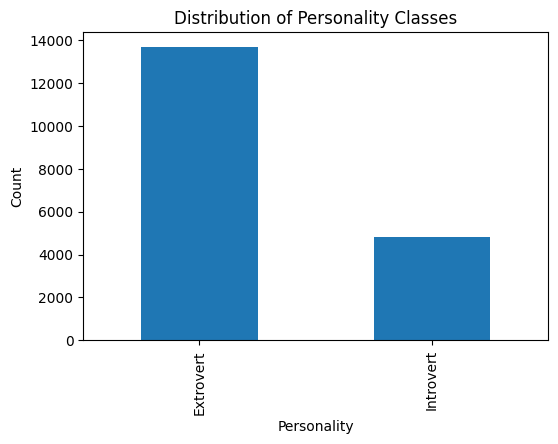

In [9]:
plt.figure(figsize=(6,4))
train_df["Personality"].value_counts().plot(kind="bar")
plt.title("Distribution of Personality Classes")
plt.xlabel("Personality")
plt.ylabel("Count")
plt.show()

In [10]:
train_df.isnull().sum()

,0
id,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


*visualize missing values for later investigations...*

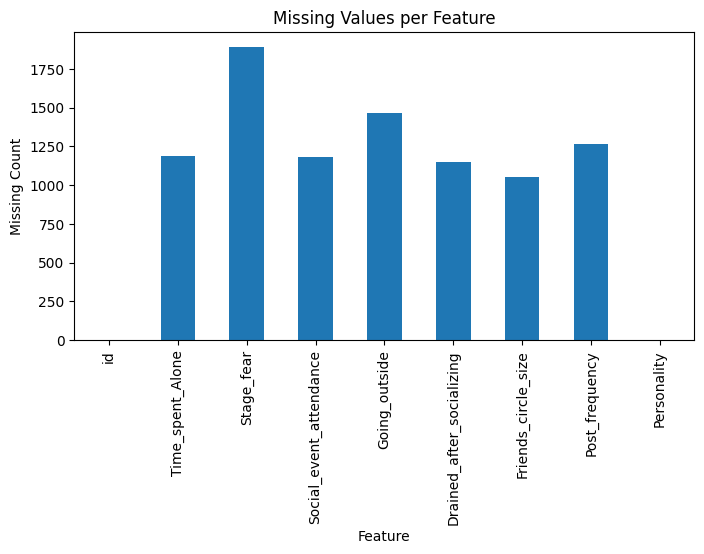

In [11]:
plt.figure(figsize=(8,4))
train_df.isnull().sum().plot(kind="bar")
plt.title("Missing Values per Feature")
plt.xlabel("Feature")
plt.ylabel("Missing Count")
plt.show()

*feature distribution analysis...*

In [12]:
numerical_features = train_df.select_dtypes(include=["float64", "int64"]).columns
numerical_features

Index(['id', 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')

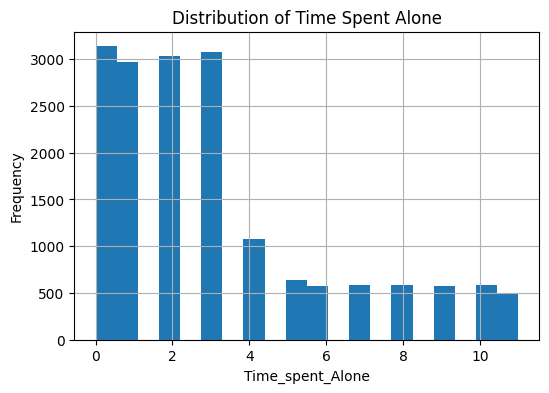

In [13]:
plt.figure(figsize=(6,4))
train_df["Time_spent_Alone"].hist(bins=20)
plt.title("Distribution of Time Spent Alone")
plt.xlabel("Time_spent_Alone")
plt.ylabel("Frequency")
plt.show()

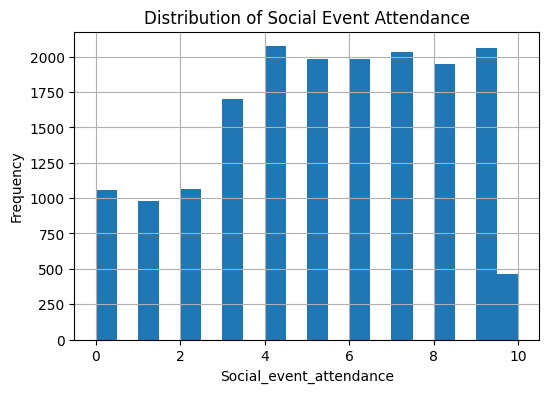

In [14]:
plt.figure(figsize=(6,4))
train_df["Social_event_attendance"].hist(bins=20)
plt.title("Distribution of Social Event Attendance")
plt.xlabel("Social_event_attendance")
plt.ylabel("Frequency")
plt.show()

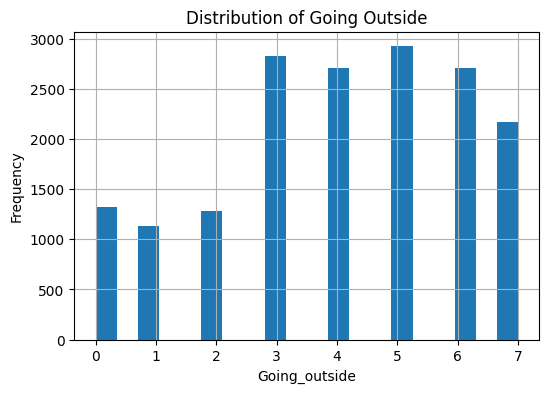

In [15]:
plt.figure(figsize=(6,4))
train_df["Going_outside"].hist(bins=20)
plt.title("Distribution of Going Outside")
plt.xlabel("Going_outside")
plt.ylabel("Frequency")
plt.show()

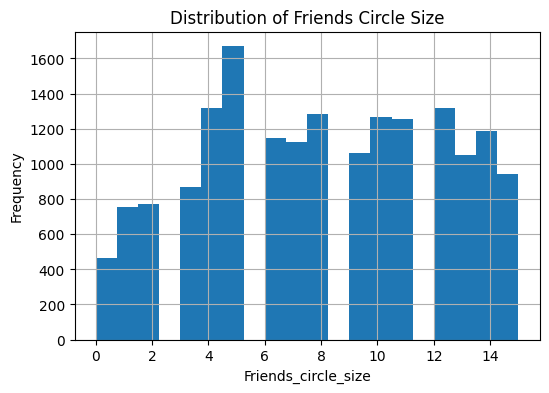

In [16]:
plt.figure(figsize=(6,4))
train_df["Friends_circle_size"].hist(bins=20)
plt.title("Distribution of Friends Circle Size")
plt.xlabel("Friends_circle_size")
plt.ylabel("Frequency")
plt.show()

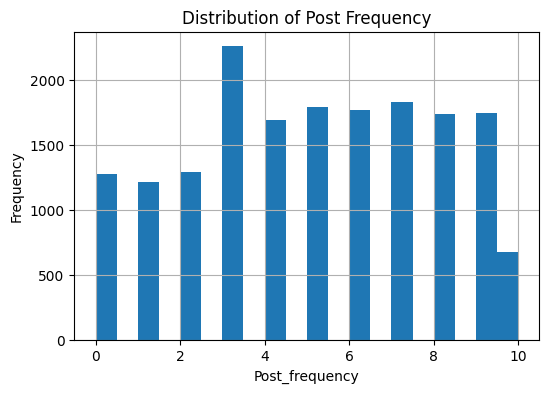

In [17]:
plt.figure(figsize=(6,4))
train_df["Post_frequency"].hist(bins=20)
plt.title("Distribution of Post Frequency")
plt.xlabel("Post_frequency")
plt.ylabel("Frequency")
plt.show()

*outlier detection...*

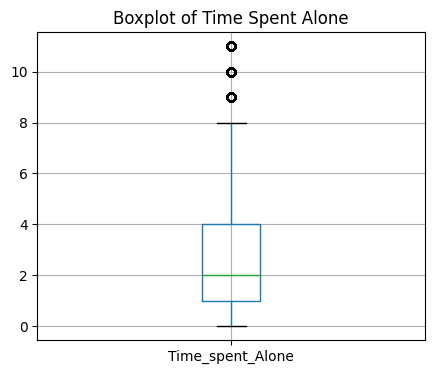

In [18]:
plt.figure(figsize=(5,4))
train_df.boxplot(column="Time_spent_Alone")
plt.title("Boxplot of Time Spent Alone")
plt.show()

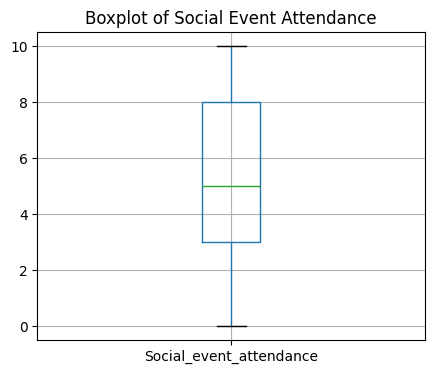

In [19]:
plt.figure(figsize=(5,4))
train_df.boxplot(column="Social_event_attendance")
plt.title("Boxplot of Social Event Attendance")
plt.show()

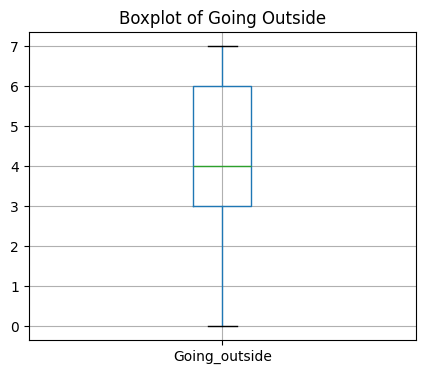

In [20]:
plt.figure(figsize=(5,4))
train_df.boxplot(column="Going_outside")
plt.title("Boxplot of Going Outside")
plt.show()

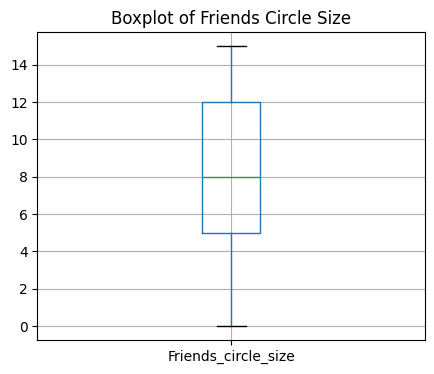

In [21]:
plt.figure(figsize=(5,4))
train_df.boxplot(column="Friends_circle_size")
plt.title("Boxplot of Friends Circle Size")
plt.show()

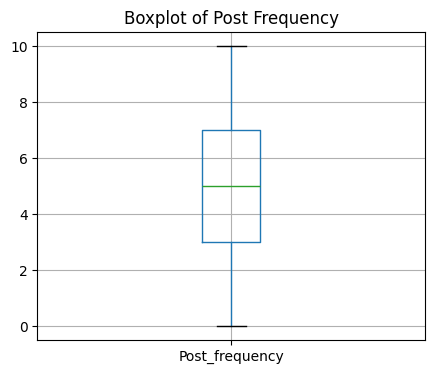

In [22]:
plt.figure(figsize=(5,4))
train_df.boxplot(column="Post_frequency")
plt.title("Boxplot of Post Frequency")
plt.show()

*feature vs target analysis...*

<Figure size 600x400 with 0 Axes>

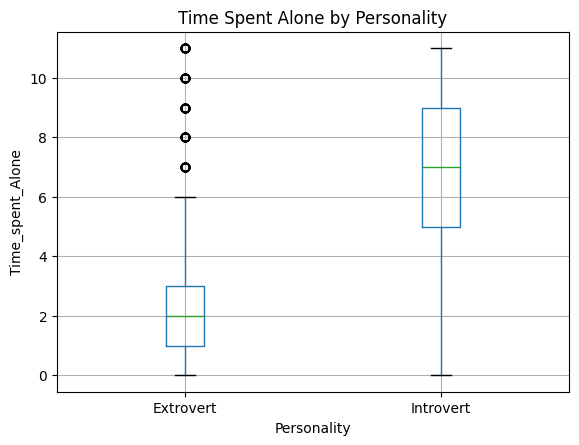

In [23]:
plt.figure(figsize=(6,4))
train_df.boxplot(column="Time_spent_Alone", by="Personality")
plt.title("Time Spent Alone by Personality")
plt.suptitle("")
plt.xlabel("Personality")
plt.ylabel("Time_spent_Alone")
plt.show()

<Figure size 600x400 with 0 Axes>

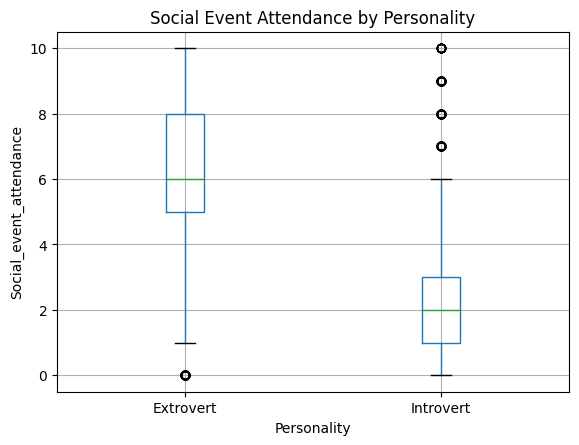

In [24]:
plt.figure(figsize=(6,4))
train_df.boxplot(column="Social_event_attendance", by="Personality")
plt.title("Social Event Attendance by Personality")
plt.suptitle("")
plt.xlabel("Personality")
plt.ylabel("Social_event_attendance")
plt.show()

<Figure size 600x400 with 0 Axes>

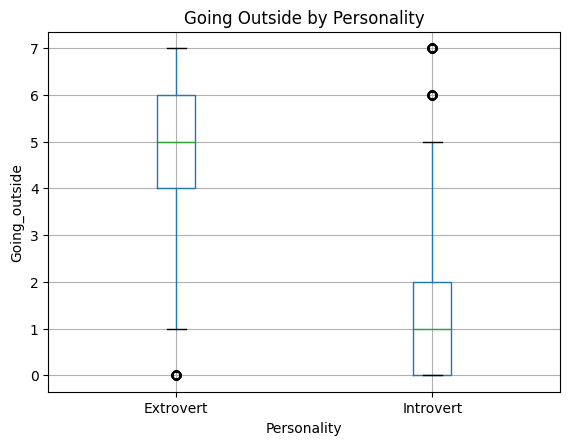

In [25]:
plt.figure(figsize=(6,4))
train_df.boxplot(column="Going_outside", by="Personality")
plt.title("Going Outside by Personality")
plt.suptitle("")
plt.xlabel("Personality")
plt.ylabel("Going_outside")
plt.show()

<Figure size 600x400 with 0 Axes>

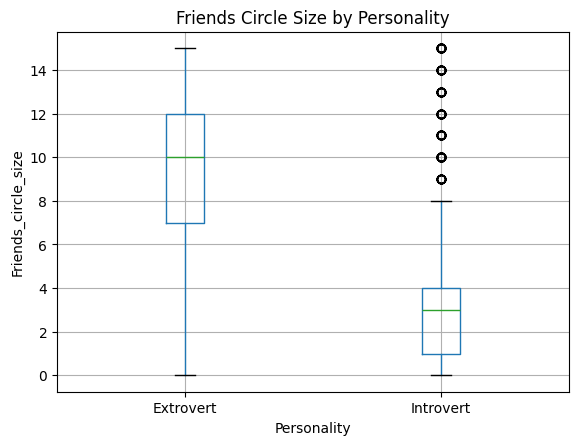

In [26]:
plt.figure(figsize=(6,4))
train_df.boxplot(column="Friends_circle_size", by="Personality")
plt.title("Friends Circle Size by Personality")
plt.suptitle("")
plt.xlabel("Personality")
plt.ylabel("Friends_circle_size")
plt.show()

<Figure size 600x400 with 0 Axes>

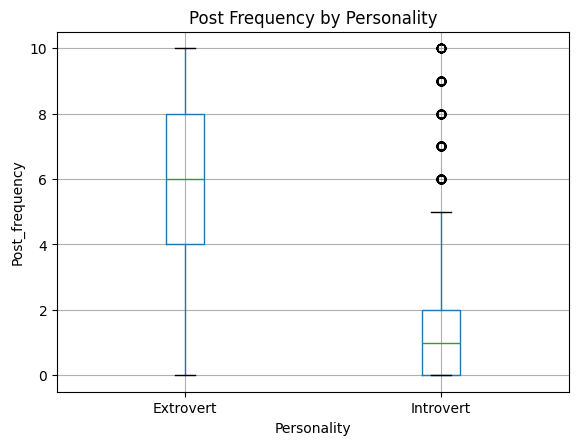

In [27]:
plt.figure(figsize=(6,4))
train_df.boxplot(column="Post_frequency", by="Personality")
plt.title("Post Frequency by Personality")
plt.suptitle("")
plt.xlabel("Personality")
plt.ylabel("Post_frequency")
plt.show()

*generate correlation matrix...*

In [28]:
corr_matrix = train_df.drop(columns=["id"]).corr(numeric_only=True)
corr_matrix

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.628806,-0.640884,-0.598014,-0.611544
Social_event_attendance,-0.628806,1.000000,0.585224,0.566675,0.566679
Going_outside,-0.640884,0.585224,1.000000,0.549864,0.579305
Friends_circle_size,-0.598014,0.566675,0.549864,1.000000,0.522272
Post_frequency,-0.611544,0.566679,0.579305,0.522272,1.000000


*plot correlation matrix heatmap...*

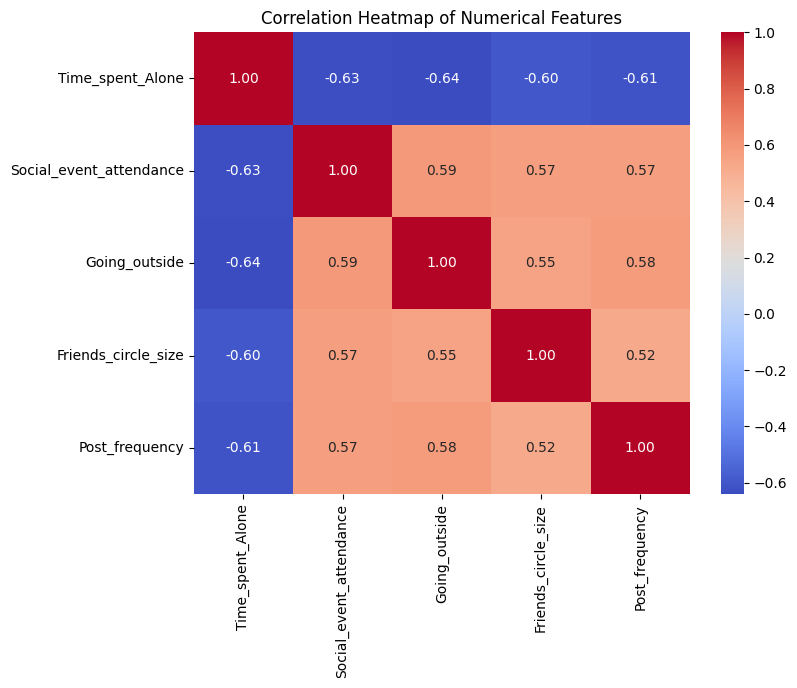

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

***data preprocessing...***

*seperate features and target...*

In [30]:
X = train_df.drop(columns=["id", "Personality"])
y = train_df["Personality"]

*seperate numerical and categorical features...*

In [31]:
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["float64", "int64"]).columns

categorical_features, numerical_features

(Index(['Stage_fear', 'Drained_after_socializing'], dtype='object'),
 Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
        'Friends_circle_size', 'Post_frequency'],
       dtype='object'))

*numerical imputation from the median...*

In [32]:
for col in numerical_features:
    X[col] = X[col].fillna(X[col].median())

*categorical imputation from the mode...*

In [33]:
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

In [34]:
X.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0


*manually encode the catergorical features with labels...*

In [35]:
X["Stage_fear"] = X["Stage_fear"].map({"Yes": 1, "No": 0})
X["Drained_after_socializing"] = X["Drained_after_socializing"].map({"Yes": 1, "No": 0})

In [36]:
X[categorical_features].head()

,Stage_fear,Drained_after_socializing
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [37]:
X.dtypes

,0
Time_spent_Alone,float64
Stage_fear,int64
Social_event_attendance,float64
Going_outside,float64
Drained_after_socializing,int64
Friends_circle_size,float64
Post_frequency,float64


***univariate outlier handling using IQR Capping...***

In [38]:
def iqr_cap(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

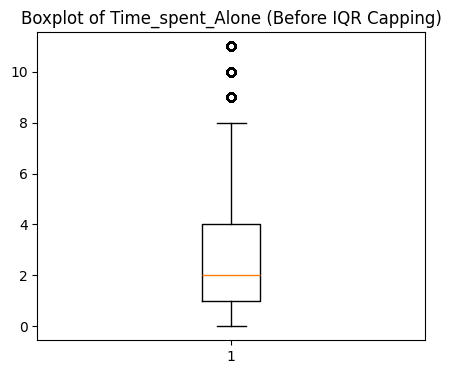

In [39]:
plt.figure(figsize=(5,4))
plt.boxplot(X["Time_spent_Alone"])
plt.title("Boxplot of Time_spent_Alone (Before IQR Capping)")
plt.show()

*apply IQR capping for numerical features (due to all numerical features showed skew or spread)...*

In [40]:
for col in numerical_features:
    X[col] = iqr_cap(X[col])

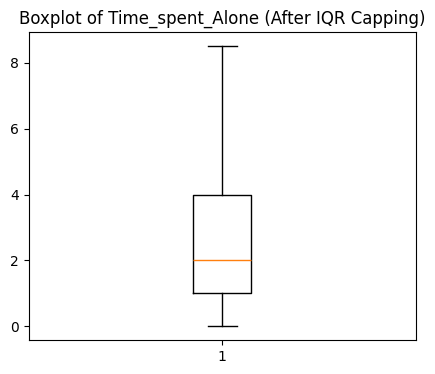

In [41]:
plt.figure(figsize=(5,4))
plt.boxplot(X["Time_spent_Alone"])
plt.title("Boxplot of Time_spent_Alone (After IQR Capping)")
plt.show()

**feature scaling...**

*fit scaler on numerical features only (since categorical features are already in binary form)...*

In [42]:
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [43]:
X[numerical_features].describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,1.852400e+04,1.852400e+04,1.852400e+04,1.852400e+04,1.852400e+04
mean,2.733004e-17,1.616788e-16,-2.067494e-16,-8.256550e-17,4.027585e-17
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-1.121362e+00,-1.969365e+00,-2.041578e+00,-1.949779e+00,-1.793144e+00
25%,-7.393287e-01,-8.436314e-01,-5.258594e-01,-7.306983e-01,-7.136560e-01
50%,-3.572953e-01,-9.314261e-02,-2.061980e-02,7.502441e-04,6.002333e-03
75%,4.067716e-01,6.573462e-01,9.898594e-01,7.321988e-01,7.256607e-01
max,2.125922e+00,1.783079e+00,1.495099e+00,1.707463e+00,1.805148e+00


*train and test split (80% training / 20% testing - using stratified split to preserve class imbalance)...*

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [45]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

,proportion
Personality,
Extrovert,0.739541
Introvert,0.260459


*train the model on Logistic Regression (**Model 1**)...*

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

*make predictions...*

In [48]:
y_pred_lr = log_reg.predict(X_test)

In [49]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, pos_label="Introvert")
recall_lr = recall_score(y_test, y_pred_lr, pos_label="Introvert")
f1_lr = f1_score(y_test, y_pred_lr, pos_label="Introvert")

accuracy_lr, precision_lr, recall_lr, f1_lr

(0.9713900134952766,
 0.9423274974253347,
 0.9481865284974094,
 0.9452479338842975)

*visualize confusion matrix...*

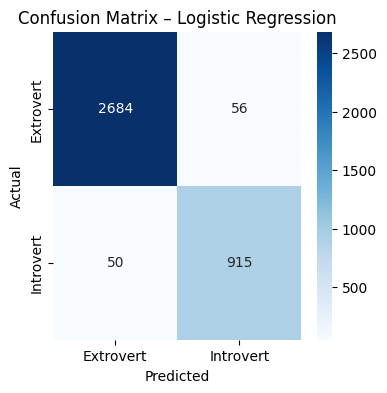

In [50]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(4,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Extrovert", "Introvert"],
            yticklabels=["Extrovert", "Introvert"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

*train the model on Support Vector Machine (SVM) (**Model 2**)...*

In [51]:
from sklearn.svm import SVC

In [52]:
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

*make predictions...*

In [53]:
y_pred_svm = svm_model.predict(X_test)

In [54]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label="Introvert")
recall_svm = recall_score(y_test, y_pred_svm, pos_label="Introvert")
f1_svm = f1_score(y_test, y_pred_svm, pos_label="Introvert")

accuracy_svm, precision_svm, recall_svm, f1_svm

(0.9713900134952766,
 0.9414182939362795,
 0.9492227979274611,
 0.9453044375644994)

*visualize confusion matrix...*

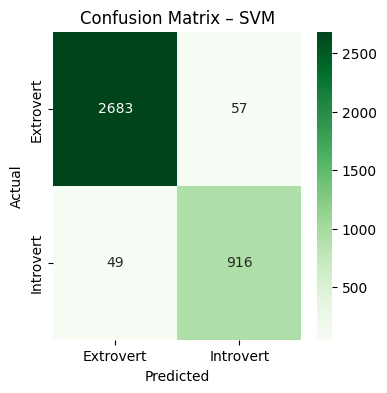

In [55]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(4,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Extrovert", "Introvert"],
            yticklabels=["Extrovert", "Introvert"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – SVM")
plt.show()

*train the model on Random Forest (**Model 3**)...*

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

*make predictions...*

In [58]:
y_pred_rf = rf_model.predict(X_test)

In [59]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label="Introvert")
recall_rf = recall_score(y_test, y_pred_rf, pos_label="Introvert")
f1_rf = f1_score(y_test, y_pred_rf, pos_label="Introvert")

accuracy_rf, precision_rf, recall_rf, f1_rf

(0.9665317139001349,
 0.9269035532994924,
 0.9461139896373058,
 0.9364102564102564)

*visualize confusion matrix...*

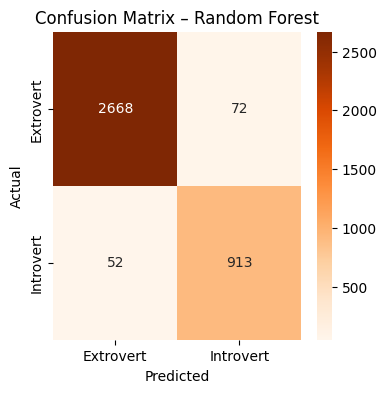

In [60]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(4,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Extrovert", "Introvert"],
            yticklabels=["Extrovert", "Introvert"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()

*compare models...*

In [61]:
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Random Forest"],
    "Accuracy": [accuracy_lr, accuracy_svm, accuracy_rf],
    "Precision": [precision_lr, precision_svm, precision_rf],
    "Recall": [recall_lr, recall_svm, recall_rf],
    "F1-score": [f1_lr, f1_svm, f1_rf]
})

results_df

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.971390,0.942327,0.948187,0.945248
1,SVM,0.971390,0.941418,0.949223,0.945304
2,Random Forest,0.966532,0.926904,0.946114,0.936410


*extract feature importance (Random Forest)...*

In [62]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance

,0
Drained_after_socializing,0.218124
Time_spent_Alone,0.213721
Stage_fear,0.210278
Post_frequency,0.115807
Social_event_attendance,0.110963
Going_outside,0.085407
Friends_circle_size,0.045700


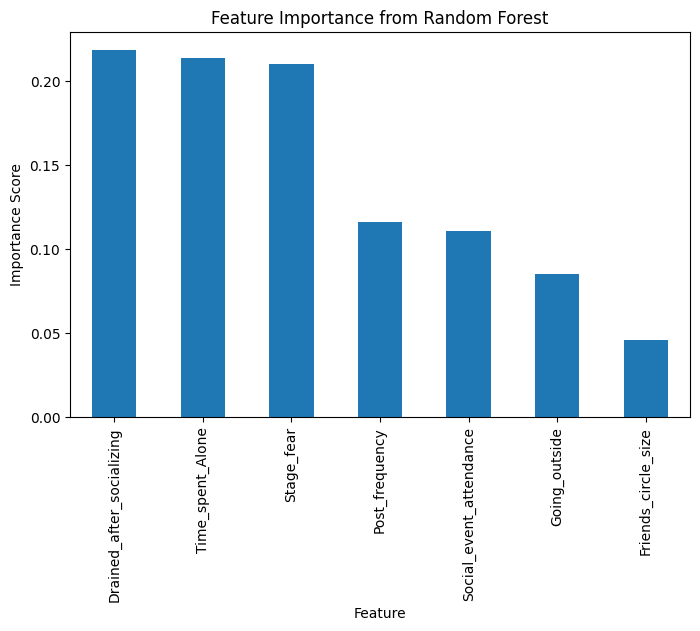

In [63]:
plt.figure(figsize=(8,5))
feature_importance.plot(kind="bar")
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.show()

***hyperparameter tuning...***

*using the SVM model as the chosen model among the three, for tuning...*

In [64]:
from sklearn.model_selection import GridSearchCV

*define parameter grid...*

In [65]:
param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", 0.1, 0.01],
    "kernel": ["rbf"]
}

In [66]:
param_table = pd.DataFrame({
    "Hyperparameter": ["C", "gamma", "kernel"],
    "Values Tested": [
        "[0.1, 1, 10]",
        "['scale', 0.1, 0.01]",
        "['rbf']"
    ]
})

param_table

,Hyperparameter,Values Tested
0,C,"[0.1, 1, 10]"
1,gamma,"['scale', 0.1, 0.01]"
2,kernel,['rbf']


In [67]:
grid_svm = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 0.01],
                         'kernel': ['rbf']},
             scoring='f1')

In [68]:
grid_svm.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

*evaluate tuned SVM on test set...*

In [69]:
best_svm = grid_svm.best_estimator_
y_pred_svm_tuned = best_svm.predict(X_test)

In [70]:
accuracy_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)
precision_svm_tuned = precision_score(y_test, y_pred_svm_tuned, pos_label="Introvert")
recall_svm_tuned = recall_score(y_test, y_pred_svm_tuned, pos_label="Introvert")
f1_svm_tuned = f1_score(y_test, y_pred_svm_tuned, pos_label="Introvert")

accuracy_svm_tuned, precision_svm_tuned, recall_svm_tuned, f1_svm_tuned

(0.9713900134952766,
 0.9414182939362795,
 0.9492227979274611,
 0.9453044375644994)

*compare before vs after tuning....*

In [71]:
tuning_comparison = pd.DataFrame({
    "Model": ["SVM (Baseline)", "SVM (Tuned)"],
    "Accuracy": [accuracy_svm, accuracy_svm_tuned],
    "Precision": [precision_svm, precision_svm_tuned],
    "Recall": [recall_svm, recall_svm_tuned],
    "F1-score": [f1_svm, f1_svm_tuned]
})

tuning_comparison

,Model,Accuracy,Precision,Recall,F1-score
0,SVM (Baseline),0.97139,0.941418,0.949223,0.945304
1,SVM (Tuned),0.97139,0.941418,0.949223,0.945304


***generate kaggle submissions - predictions from multiple trained models are generated and submitted to the Kaggle competition to externally compare their generalization performance...***

*prepare fresh test data for kaggle...*

In [96]:
test_df = pd.read_csv("/content/drive/MyDrive/personality_prediction_ml_kaggle_competition/test.csv")

# separate features
X_test_kaggle = test_df.drop(columns=["id"])

# handle missing values
for col in numerical_features:
    X_test_kaggle[col] = X_test_kaggle[col].fillna(X_test_kaggle[col].median())

for col in categorical_features:
    X_test_kaggle[col] = X_test_kaggle[col].fillna(X_test_kaggle[col].mode()[0])

# encode categorical features
X_test_kaggle["Stage_fear"] = X_test_kaggle["Stage_fear"].map({"Yes": 1, "No": 0})
X_test_kaggle["Drained_after_socializing"] = X_test_kaggle["Drained_after_socializing"].map({"Yes": 1, "No": 0})

# apply IQR capping
for col in numerical_features:
    X_test_kaggle[col] = iqr_cap(X_test_kaggle[col])

# enforce feature order
X_test_kaggle = X_test_kaggle[X_train.columns.tolist()]

X_test_kaggle.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.0,0,7.0,4.0,0,6.0,5.0
1,2.0,1,0.0,0.0,1,5.0,1.0
2,3.0,0,5.0,6.0,0,15.0,9.0
3,3.0,0,4.0,4.0,0,5.0,6.0
4,8.5,1,1.0,2.0,1,1.0,1.0


*generate prediction results from all three models...*

In [97]:
kaggle_preds_lr = log_reg.predict(X_test_kaggle)

In [98]:
kaggle_preds_rf = rf_model.predict(X_test_kaggle)

In [99]:
kaggle_preds_svm = svm_model.predict(X_test_kaggle)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


*generate submission files...*

In [100]:
# Logistic Regression submission
submission_lr = pd.DataFrame({
    "id": test_df["id"],
    "Personality": kaggle_preds_lr
})
submission_lr.to_csv("submission_logistic_regression.csv", index=False)

# Random Forest submission
submission_rf = pd.DataFrame({
    "id": test_df["id"],
    "Personality": kaggle_preds_rf
})
submission_rf.to_csv("submission_random_forest.csv", index=False)

# SVM submission
submission_svm = pd.DataFrame({
    "id": test_df["id"],
    "Personality": kaggle_preds_svm
})
submission_svm.to_csv("submission_svm.csv", index=False)

*download submission files...*

In [101]:
from google.colab import files

files.download("submission_logistic_regression.csv")
files.download("submission_random_forest.csv")
files.download("submission_svm.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*using the SVM Baseline model as the final model (since it showed similar performance even after tuning)...*

In [72]:
final_model = svm_model

*creating a pipeline object...*

In [73]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ("scaler", scaler),
    ("model", final_model)
])

*fit pipeline on full training data...*

In [74]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(random_state=42))])

*test the model (input of a Introvert person)...*

In [75]:
sample_input = {
    "Time_spent_Alone": 6,
    "Social_event_attendance": 2,
    "Going_outside": 1,
    "Friends_circle_size": 3,
    "Post_frequency": 1,
    "Stage_fear": 1,  # Yes
    "Drained_after_socializing": 1  # Yes
}

In [76]:
feature_order = X.columns.tolist()
feature_order

['Time_spent_Alone',
 'Stage_fear',
 'Social_event_attendance',
 'Going_outside',
 'Drained_after_socializing',
 'Friends_circle_size',
 'Post_frequency']

In [77]:
sample_df = pd.DataFrame([sample_input])[feature_order]
sample_df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,6,1,2,1,1,3,1


In [78]:
prediction = pipeline.predict(sample_df)
prediction

array(['Introvert'], dtype=object)

*test the model (input of a Extrovert person)...*

In [79]:
sample_input_extrovert = {
    "Time_spent_Alone": 1,
    "Social_event_attendance": 8,
    "Going_outside": 6,
    "Friends_circle_size": 12,
    "Post_frequency": 8,
    "Stage_fear": 0,  # No
    "Drained_after_socializing": 0  # No
}

sample_df_extrovert = pd.DataFrame([sample_input_extrovert])[feature_order]
pipeline.predict(sample_df_extrovert)

array(['Introvert'], dtype=object)

=================================================================================

***this section is intentionally separated from the modelling pipeline to avoid double calling and ensure deployment safety.
same steps will be performed again to get a clean scale...***

In [80]:
X_raw = train_df.drop(columns=["id", "Personality"])
y_raw = train_df["Personality"]

*handle missing values...*

In [81]:
for col in numerical_features:
    X_raw[col] = X_raw[col].fillna(X_raw[col].median())

for col in categorical_features:
    X_raw[col] = X_raw[col].fillna(X_raw[col].mode()[0])

*encode categorical variables...*

In [82]:
X_raw["Stage_fear"] = X_raw["Stage_fear"].map({"Yes": 1, "No": 0})
X_raw["Drained_after_socializing"] = X_raw["Drained_after_socializing"].map({"Yes": 1, "No": 0})

*apply IQR capping (same logic as modelling phase)...*

In [83]:
for col in numerical_features:
    X_raw[col] = iqr_cap(X_raw[col])

*build deployment pipeline...*

In [84]:
deployment_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", SVC(
        kernel="rbf",
        C=0.1,
        gamma="scale",
        probability=True,
        random_state=42
    ))
])

deployment_pipeline.fit(X_raw, y_raw)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, probability=True, random_state=42))])

In [85]:
feature_order = X_raw.columns.tolist()

test to ensure no double-scaling...

In [86]:
sample_introvert = {
    "Time_spent_Alone": 6,
    "Social_event_attendance": 2,
    "Going_outside": 1,
    "Friends_circle_size": 3,
    "Post_frequency": 1,
    "Stage_fear": 1, # Yes
    "Drained_after_socializing": 1 # Yes
}

sample_extrovert = {
    "Time_spent_Alone": 1,
    "Social_event_attendance": 8,
    "Going_outside": 6,
    "Friends_circle_size": 12,
    "Post_frequency": 8,
    "Stage_fear": 0, # No
    "Drained_after_socializing": 0 # No
}

sample_introvert_df = pd.DataFrame([sample_introvert])[feature_order]
sample_extrovert_df = pd.DataFrame([sample_extrovert])[feature_order]

print("Introvert prediction:", deployment_pipeline.predict(sample_introvert_df)[0])
print("Extrovert prediction:", deployment_pipeline.predict(sample_extrovert_df)[0])

Introvert prediction: Introvert
Extrovert prediction: Extrovert


*serialize/export the model...*

In [87]:
import joblib

joblib.dump(deployment_pipeline, "personality_prediction_model.pkl")
print("Deployment model saved as personality_prediction_model.pkl")

Deployment model saved as personality_prediction_model.pkl


=================================================================================

***prepare kaggle submission...***

*load test data...*

In [88]:
test_df = pd.read_csv("/content/drive/MyDrive/personality_prediction_ml_kaggle_competition/test.csv")
test_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [89]:
X_test_kaggle = test_df.drop(columns=["id"])

In [90]:
# missing values
for col in numerical_features:
    X_test_kaggle[col] = X_test_kaggle[col].fillna(X_test_kaggle[col].median())

for col in categorical_features:
    X_test_kaggle[col] = X_test_kaggle[col].fillna(X_test_kaggle[col].mode()[0])

# encoding
X_test_kaggle["Stage_fear"] = X_test_kaggle["Stage_fear"].map({"Yes": 1, "No": 0})
X_test_kaggle["Drained_after_socializing"] = X_test_kaggle["Drained_after_socializing"].map({"Yes": 1, "No": 0})

# IQR capping
for col in numerical_features:
    X_test_kaggle[col] = iqr_cap(X_test_kaggle[col])

*enforce feature order to avoid silent kaggle submission errors...*

In [91]:
X_test_kaggle = X_test_kaggle[feature_order]

In [92]:
kaggle_predictions = deployment_pipeline.predict(X_test_kaggle)

In [93]:
submission = pd.DataFrame({
    "id": test_df["id"],
    "Personality": kaggle_predictions
})

submission.head()

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


*save submission file...*

In [94]:
submission.to_csv("submission.csv", index=False)